In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [55]:
df = pd.read_csv("all_data.csv")
print(df.head())
print(df.dtypes)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [56]:
#Checking data for unique values and missing data
print(len(df))
print(df.Country.unique())
print(df.Country.nunique())
print(df.Year.unique())
print(df.Year.nunique())
print(df.isna().sum())

96
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
6
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
16
Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


In [57]:
df["GDP_in_billions"] = df.GDP/1000000000.
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP  \
0   Chile  2000                              77.3  7.786093e+10   
1   Chile  2001                              77.3  7.097992e+10   
2   Chile  2002                              77.8  6.973681e+10   
3   Chile  2003                              77.9  7.564346e+10   
4   Chile  2004                              78.0  9.921039e+10   

   GDP_in_billions  
0        77.860932  
1        70.979924  
2        69.736811  
3        75.643460  
4        99.210393  


In [58]:
#Break DF into countries
df_Chile = df[df.Country == "Chile"]
df_China = df[df.Country == "China"]
df_Germany = df[df.Country == "Germany"]
df_Mexico = df[df.Country == "Mexico"]
df_USA = df[df.Country == "United States of America"]
df_Zimbabwe = df[df.Country == "Zimbabwe"]

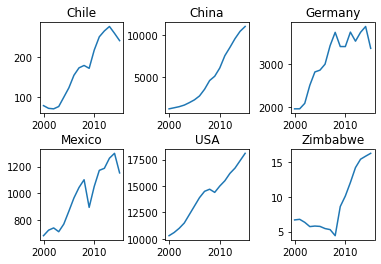

In [59]:
#Trends of GDP for each country
ax1 = plt.subplot(2,3,1)
plt.plot(
    df_Chile.Year,
    df_Chile.GDP_in_billions,
    label = "Chile"
)
plt.title("Chile")

ax2 = plt.subplot(2,3,2)
plt.plot(
    df_China.Year,
    df_China.GDP_in_billions,
    label = "China"
)
plt.title("China")

ax3 = plt.subplot(2,3,3)
plt.plot(
    df_Germany.Year,
    df_Germany.GDP_in_billions,
    label = "Germany"
)
plt.title("Germany")

ax4 = plt.subplot(2,3,4)
plt.plot(
    df_Mexico.Year,
    df_Mexico.GDP_in_billions,
    label = "Mexico"
)
plt.title("Mexico")

ax5 = plt.subplot(2,3,5)
plt.plot(
    df_USA.Year,
    df_USA.GDP_in_billions,
    label = "USA"
)
plt.title("USA")

ax6 = plt.subplot(2,3,6)
plt.plot(
    df_Zimbabwe.Year,
    df_Zimbabwe.GDP_in_billions,
    label = "Zimbabwe"
)
plt.title("Zimbabwe")

plt.subplots_adjust(wspace = 0.5, hspace = 0.4)

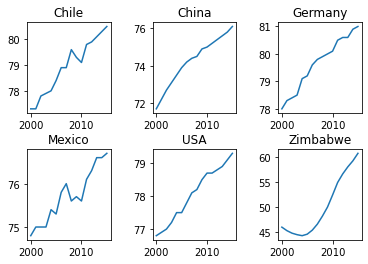

In [60]:
#Trends of Life expectancy for each country
plt.clf()
ax1_y = plt.subplot(2,3,1)
plt.plot(
    df_Chile.Year,
    df_Chile["Life expectancy at birth (years)"],
    label = "Chile"
)
plt.title("Chile")

ax2_y = plt.subplot(2,3,2)
plt.plot(
    df_China.Year,
    df_China["Life expectancy at birth (years)"],
    label = "China"
)
plt.title("China")

ax3_y = plt.subplot(2,3,3)
plt.plot(
    df_Germany.Year,
    df_Germany["Life expectancy at birth (years)"],
    label = "Germany"
)
plt.title("Germany")

ax4_y = plt.subplot(2,3,4)
plt.plot(
    df_Mexico.Year,
    df_Mexico["Life expectancy at birth (years)"],
    label = "Mexico"
)
plt.title("Mexico")

ax5_y = plt.subplot(2,3,5)
plt.plot(
    df_USA.Year,
    df_USA["Life expectancy at birth (years)"],
    label = "USA"
)
plt.title("USA")

ax6_y = plt.subplot(2,3,6)
plt.plot(
    df_Zimbabwe.Year,
    df_Zimbabwe["Life expectancy at birth (years)"],
    label = "Zimbabwe"
)
plt.title("Zimbabwe")

plt.subplots_adjust(wspace = 0.5, hspace = 0.4)


Text(0.5, 0, 'Life expectancy in years')

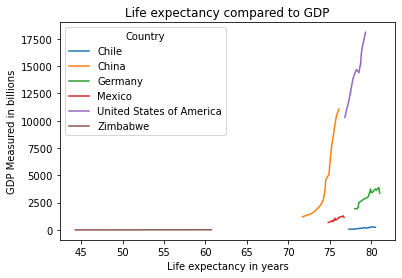

In [61]:
#Now check relation between the two
plt.clf()
sns.lineplot(
    data = df,
    x = "Life expectancy at birth (years)",
    y = "GDP_in_billions",
    hue = "Country"
)
plt.title("Life expectancy compared to GDP")
plt.ylabel("GDP Measured in billions")
plt.xlabel("Life expectancy in years")


In [46]:
#Calculate correlation

                     
overall_correlation, overall_pval = pearsonr(df["Life expectancy at birth (years)"], df["GDP_in_billions"])
print(overall_correlation)

0.343206748449156


The correlation in Chile is 0.9498766659254415


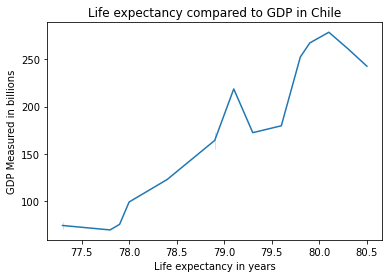

In [48]:
#Relation in Chile
plt.clf()
sns.lineplot(
    data = df_Chile,
    x = "Life expectancy at birth (years)",
    y = "GDP_in_billions"
)
plt.title("Life expectancy compared to GDP in Chile")
plt.ylabel("GDP Measured in billions")
plt.xlabel("Life expectancy in years")

Chile_correlation, overall_pval = pearsonr(df_Chile["Life expectancy at birth (years)"], df_Chile["GDP_in_billions"])
print("The correlation in Chile is {}".format(Chile_correlation))

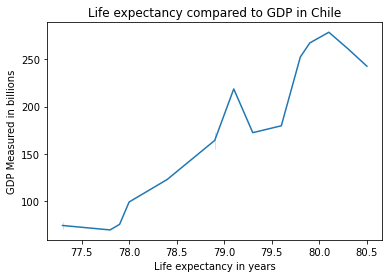

The correlation in Chile is 0.9498766659254415


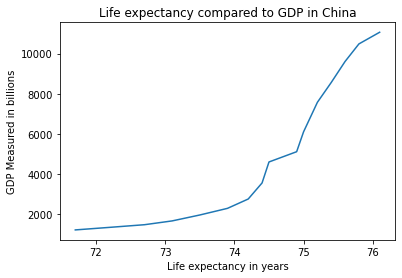

The correlation in China is 0.9085255408648358


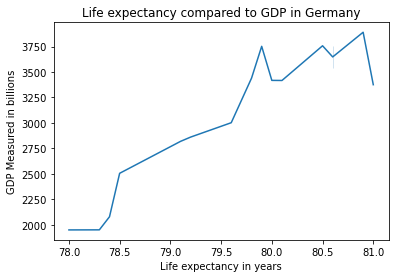

The correlation in Germany is 0.9326988982561268


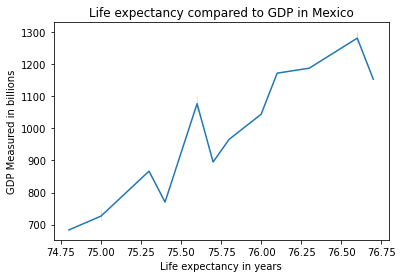

The correlation in Mexico is 0.9322377167847082


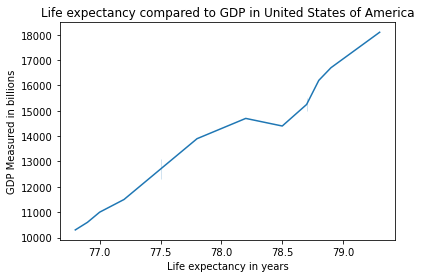

The correlation in United States of America is 0.9817092382430257


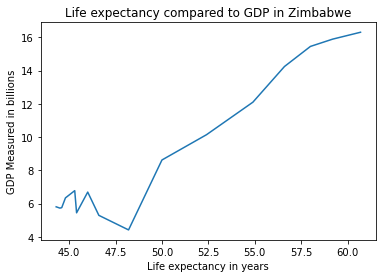

The correlation in Zimbabwe is 0.9661998955858779


In [62]:

countries = df.Country.unique()
for country in countries:
    plt.clf()
    country_df = df[df.Country == country]
    sns.lineplot(
        data = country_df,
        x = "Life expectancy at birth (years)",
        y = "GDP_in_billions"
    )
    plt.title("Life expectancy compared to GDP in {}".format(country))
    plt.ylabel("GDP Measured in billions")
    plt.xlabel("Life expectancy in years")
    plt.show()

    country_correlation, overall_pval = pearsonr(country_df["Life expectancy at birth (years)"], country_df["GDP_in_billions"])
    print("The correlation in {} is {}".format(country, country_correlation))

The correlation between GDP and Life expectancy when viewed for all countries at once is not a strong one, at just under 0.35. However, when we compare each country’s GDP with their respective life expectancy, we find that all correlations are very strong. Each country has a correlation of over 0.9 (0.7 is one common number to indicate a strong correlation). So, we know that the GDP and life expectancy will often move higher or lower together. This trend happens regardless of where we find the GDP in the year 2000, when we began tracking the movement. 

It should also be noted that higher GDP does not indicate a stronger relation between the life expectancy and GDP. The highest correlation was found in the US, at over .98, but China has the second highest GDP with the lowest correlation of any of the observed nations. The second strongest correlation was observed in Zimbabwe, the poorest of any of the six nations. A similar pattern may be observed if we observe the life expectancy in 2000 of any given country.  

Another point of note is that high ranking life expectancy also does not indicate a higher-ranking GDP. While the US has the highest GDP, both Germany and Chile had higher life expectancies. Additionally, China has the second highest GDP for roughly half of the years tracked, but the second lowest life expectancy as well. 

We conclude that the correlation is predominantly seen in the growth or change of the two. One possible reason for this may be that as the GDP increases, the population may have an increased ability to afford medical services. Additionally, as wealth of a nation increases, we may see more development, allowing for improved and cutting-edge healthcare services. We also note that for most nations, both GDP and life expectancy had positive trends, indicating there may be outside factors causing the increase of both. 

It may be of particular interest to account for the population, economies, and infrastructure of each of these nations. If we account for a country with a large population, does the GDP per capita increase in a similar way to a smaller country with the same life expectancy? Does the growth in GDP indicate an increase in investments in infrastructure, and accessibility of services? Is it simply that having more money causes fewer medical needs? These additional factors will help understand the relationship between the GDP and life expectancy of a nation even better.
